# 05.05 - Naive Bayes Classification

In the previous four sections, we mostly focused on a general overview of the concepts of machine learning. This and the following 8 sections, on the other end, will focus on specific alogorithms for supervised and unsupervised learning.

In this Chapter, we will have a look at **Naive Bayes** models, a class of fast models with very few tunable parameters, very suitable for a quick and dirty baseline for more complex classification algorithms. 

### Bayes Classification

Naive Bayes classifiers rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities: 

<code>P(L | features) = [P(features | L) P(L)] / P(features)

Assuming we have to decide between two labels, we can compute the ratio of the two posterior probabilities for each label.
All we need now is some model by which we can compute P(features | Li) for each label. Such a model is called a **generative model** because it specifies the hypothetical random process that generates the data. 

Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. 

The general version of such a training step is a very difficult task, but we can make it simpler through the use of some **simplifying assumptions** about the form of this model, hence the term _naive_. 

Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections:

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Gaussian Naive Bayes

Probably the easiest naive Bayes classifier to understand. In this classifier, the assumption is that data from each label is drawn from a simple **Gaussian distribution**:

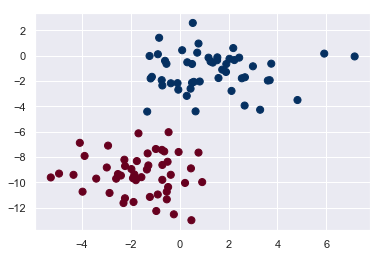

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

An extremely fast way to create a model in this case is assuming Gaussian distribution with no covariance among variables. Now we will only need mean and standard deviation of the points within each label to fit the model. 

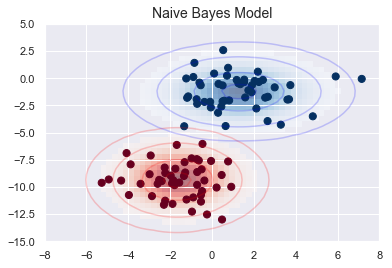

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

fig.savefig('figures/05.05-gaussian-NB.png')